In [29]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import scanpy as sc
import anndata
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

adata_adt = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/codex_adata.h5ad')
adata_adt.obs['cluster'] = adata_adt.obs['leiden'] 
adata_smoothed = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/visium_adata_r1.h5ad')
adata_totalvi = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/totalvi_fig4.h5ad')

adata_rna = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/visium_adata.h5ad')
adata_rna = adata_rna[:,np.load('fig4_gene_list.npy', allow_pickle=True)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
adata_totalvi.var_names

Index(['Xkr4', 'Gm37988', 'St18', 'Sntg1', 'A830018L16Rik', 'Prex2', 'Sulf1',
       'Ly96', 'Pi15', 'Khdc1a',
       ...
       'Gemin8', 'Tceanc', 'Hccs', 'Ddx3y', 'Gm28576', 'Gm20896', 'Prps2',
       'Gm29110', 'Csprs', 'AC149090.1'],
      dtype='object', length=3027)

In [31]:
np.intersect1d(adata_rna.var_names,adata_totalvi.var_names).shape

(1547,)

In [32]:
adata = adata_rna.copy()
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30)
sc.tl.leiden(adata, resolution=1.5)
sc.tl.umap(adata)
adata.obs['cluster'] = adata.obs['leiden']

adata.write('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/M1_simu1.h5ad')
adata.obs['cluster'].unique()

['5', '3', '4', '11', '1', ..., '14', '18', '13', '17', '16']
Length: 22
Categories (22, object): ['0', '1', '2', '3', ..., '18', '19', '20', '21']

In [33]:
adata_adt

AnnData object with n_obs × n_vars = 4468 × 51
    obs: 'orig.ident', 'x', 'y', 'leiden', 'cluster'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata = adata_adt.copy()
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.leiden(adata, resolution=1.203)
sc.tl.umap(adata)

adata.obs['cluster'] = adata.obs['leiden']

adata.write('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/M2_simu1.h5ad')
adata.obs['cluster'].unique()

['5', '3', '14', '12', '6', ..., '8', '10', '4', '9', '13']
Length: 15
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '14']

In [34]:
sc.tl.pca(adata_rna, svd_solver='arpack')
sc.tl.pca(adata_adt, svd_solver='arpack')

scaler_adt = StandardScaler()
scaler_rna = StandardScaler()

pca_adt_normalized = scaler_adt.fit_transform(adata_adt.obsm['X_pca'])
pca_rna_normalized = scaler_rna.fit_transform(adata_rna.obsm['X_pca'])

# Step 2: Concatenate the normalized PCA components
pca_concatenated = np.concatenate([pca_adt_normalized, pca_rna_normalized], axis=1)

# Step 3: Create the concatenated AnnData object and update PCA and spatial information
adata_concate = sc.concat([adata_adt, adata_rna], axis=1)
adata_concate.obsm['X_pca'] = pca_concatenated
adata_concate.obsm['spatial'] = adata_adt.obsm['spatial']  # Assuming spatial info is from adata_adt

# Step 4: Proceed with downstream analysis (neighbors, Leiden clustering, UMAP)
sc.pp.neighbors(adata_concate, n_neighbors=30, n_pcs=50)
sc.tl.leiden(adata_concate, resolution=0.4)
sc.tl.umap(adata_concate)

adata_concate.obs['cluster'] = adata_concate.obs['leiden']
adata_concate.write('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/pcaconcat_fig4.h5ad')
adata_concate.obs['leiden'].unique()

/hpc/mydata/siyu.he/anaconda/2023.03/x86_64/envs/scvi_v1_env/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


['1', '4', '5', '0', '3', ..., '8', '10', '13', '12', '14']
Length: 15
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '14']

In [122]:
adata_spatialglue = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/spatialglue_fig4.h5ad')
adata_totalvi = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/totalvi_fig4.h5ad')
adata_coral = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/coral_fig4_3.h5ad')

adata_pca = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/pcaconcat_fig4.h5ad')
adata_M1 = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/M1_simu1.h5ad')
adata_M2 = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/M2_simu1.h5ad')


adata_downsized_M1 = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/coral_results/fig4/visium_adata_r1.h5ad')
adata = sc.read_h5ad('/hpc/mydata/siyu.he/Siyu_projects/coral_storage/Data_SpatialGlue/Dataset3_Mouse_Thymus1/adata_thymus1_annotation.h5ad')
adata_spatialglue.obs['cluster'] = adata_spatialglue.obs['leiden']


adata_spatialglue = adata_spatialglue[adata.obs_names,:]
adata_totalvi = adata_totalvi[adata.obs_names,:]
adata_coral = adata_coral[adata.obs_names,:]
adata_pca = adata_pca[adata.obs_names,:]
adata_M1 = adata_M1[adata.obs_names,:]
adata_M2 = adata_M2[adata.obs_names,:]

In [123]:
def calculate_anova_for_metrics(bootstrapped_scores, methods_label):
    """
    Perform ANOVA for each metric across all methods.

    Parameters:
    - bootstrapped_scores: Nested dictionary with bootstrapped scores for each metric and method.
    - methods_label: List of method names.

    Returns:
    - anova_results: Dictionary with metric as key and (F-statistic, p-value) as value.
    """
    anova_results = {}
    for metric, method_scores in bootstrapped_scores.items():
        # Collect scores for this metric across all methods
        metric_data = [method_scores[method] for method in methods_label]
        
        # Perform ANOVA
        f_stat, p_val = f_oneway(*metric_data)
        anova_results[metric] = (f_stat, p_val)
    return anova_results


def bootstrap_anova_with_calculate_scores(adata, annotation_key, methods_label, methods, leiden_keys, n_bootstrap=1000):
    """
    Perform bootstrapping to calculate ANOVA p-values for each metric using the calculate_scores function.

    Parameters:
    - adata: AnnData object containing the true annotations.
    - annotation_key: Key for the true annotations in adata.obs.
    - methods_label: List of method names.
    - methods: List of AnnData objects for clustering methods.
    - leiden_keys: List of keys for cluster labels in methods.obs.
    - n_bootstrap: Number of bootstrap iterations.

    Returns:
    - anova_results: Dictionary where each key is a metric, and the value is (F-statistic, p-value).
    - bootstrapped_scores: Dictionary of dictionaries with scores for each metric and method.
    """
    # Initialize bootstrapped scores for all metrics
    metrics = ['Homogeneity', 'Mutual_info', 'V_measure', 'AMI', 'NMI', 'ARI']
    bootstrapped_scores = {metric: {label: [] for label in methods_label} for metric in metrics}
    for _ in range(n_bootstrap):
        # Resample indices with replacement
        indices = np.random.choice(adata.obs[annotation_key].index, size=len(adata.obs), replace=True)
        true_resampled = adata.obs[annotation_key].loc[indices]

        # Loop through each method and calculate scores
        for label, method, leiden_key in zip(methods_label, methods, leiden_keys):

            predicted_resampled = method.obs[leiden_key].reindex(indices)
            if predicted_resampled.isnull().any():
                continue  # Skip if NaNs exist

            # Calculate metrics using the resampled labels
            resampled_scores = {
                'Homogeneity': homogeneity_completeness_v_measure(true_resampled, predicted_resampled)[0],
                'Mutual_info': mutual_info_score(true_resampled, predicted_resampled),
                'V_measure':homogeneity_completeness_v_measure(true_resampled, predicted_resampled)[2],
                'AMI': adjusted_mutual_info_score(true_resampled, predicted_resampled),
                'NMI': normalized_mutual_info_score(true_resampled, predicted_resampled),
                'ARI': adjusted_rand_score(true_resampled, predicted_resampled),
            }

            # Append each metric's score to the corresponding list
            for metric, score in resampled_scores.items():
                bootstrapped_scores[metric][label].append(score)
    anova_results = calculate_anova_for_metrics(bootstrapped_scores, methods_label)

    return bootstrapped_scores, anova_results



In [124]:
adata

AnnData object with n_obs × n_vars = 4468 × 15690
    obs: 'orig.ident', 'x', 'y', 'n_genes', 'mclust', 'label_new', 'label_origi', 'RNA_label_origi', 'Pro_label_origi', 'RNA_label_new', 'Pro_label_new', 'label_new_combined', 'SpatialGlue', 'MEFISTO', 'MOFA', 'Seurat', 'StabMap', 'MultiVI', 'totalVI', 'scMM', 'Annotation'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Annotation_colors', 'MEFISTO_colors', 'MOFA_colors', 'MultiVI_colors', 'Seurat_colors', 'SpatialGlue_colors', 'StabMap_colors', 'adj', 'hvg', 'label_new_colors', 'label_new_combined_colors', 'label_origi_colors', 'leiden', 'log1p', 'neighbors', 'scMM_colors', 'totalVI_colors', 'umap'
    obsm: 'Pro_feat', 'Pro_feat_pca', 'Pro_latent', 'Pro_latent_pca', 'RNA_feat', 'RNA_feat_pca', 'RNA_latent', 'RNA_latent_pca', 'X_StabMap', 'X_umap', 'alpha', 'alpha_omics_1', 'alpha_omics_2', 'emb', 'emb_combined', 'emb_combined_pca', 'emb_pca', 'feat', 'graph_feat', 'origi_

In [128]:
from sklearn.metrics import adjusted_mutual_info_score,adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure, mutual_info_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
adata_list = [adata_M1,adata_M2, adata_pca, adata_totalvi,adata_spatialglue,adata_coral]
clusters = {}
for i, adata_ in enumerate(adata_list):
    clusters[f'data_{i+1}_cluster'] = adata_.obs['cluster']

    
# Ground truth regions
true_labels = list(adata.obs['Annotation'])

In [129]:
methods_label = ['Modality 1', 'Modality 2', 'PCA concat', 'totalVI', 'SpatialGlue', 'Coral']
leiden_keys = ['cluster', 'cluster', 'cluster', 'cluster', 'cluster', 'cluster']

# Call the function
bootstrapped_scores, anova_results = bootstrap_anova_with_calculate_scores(
    adata=adata, annotation_key='Annotation',
    methods_label=methods_label, methods=[adata_M1, adata_M2, adata_pca, adata_totalvi, adata_spatialglue, adata_coral],
    leiden_keys=leiden_keys, n_bootstrap=10
)

# Display ANOVA results
for metric, (f_stat, p_val) in anova_results.items():
    print(f"{metric}: F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")


Homogeneity: F-statistic = 2956.795, p-value = 1.578e-64
Mutual_info: F-statistic = 2774.736, p-value = 8.716e-64
V_measure: F-statistic = 1998.512, p-value = 5.883e-60
AMI: F-statistic = 2027.905, p-value = 3.975e-60
NMI: F-statistic = 1998.512, p-value = 5.883e-60
ARI: F-statistic = 2043.738, p-value = 3.226e-60


In [136]:
import matplotlib as mpl
# Set the font family to DejaVuSans or another font with full sentence support
mpl.rcParams['pdf.fonttype'] = 42  # Ensures text is stored as Type 3 font (OpenType)
mpl.rcParams['ps.fonttype'] = 42  # PostScript font type for compatibility


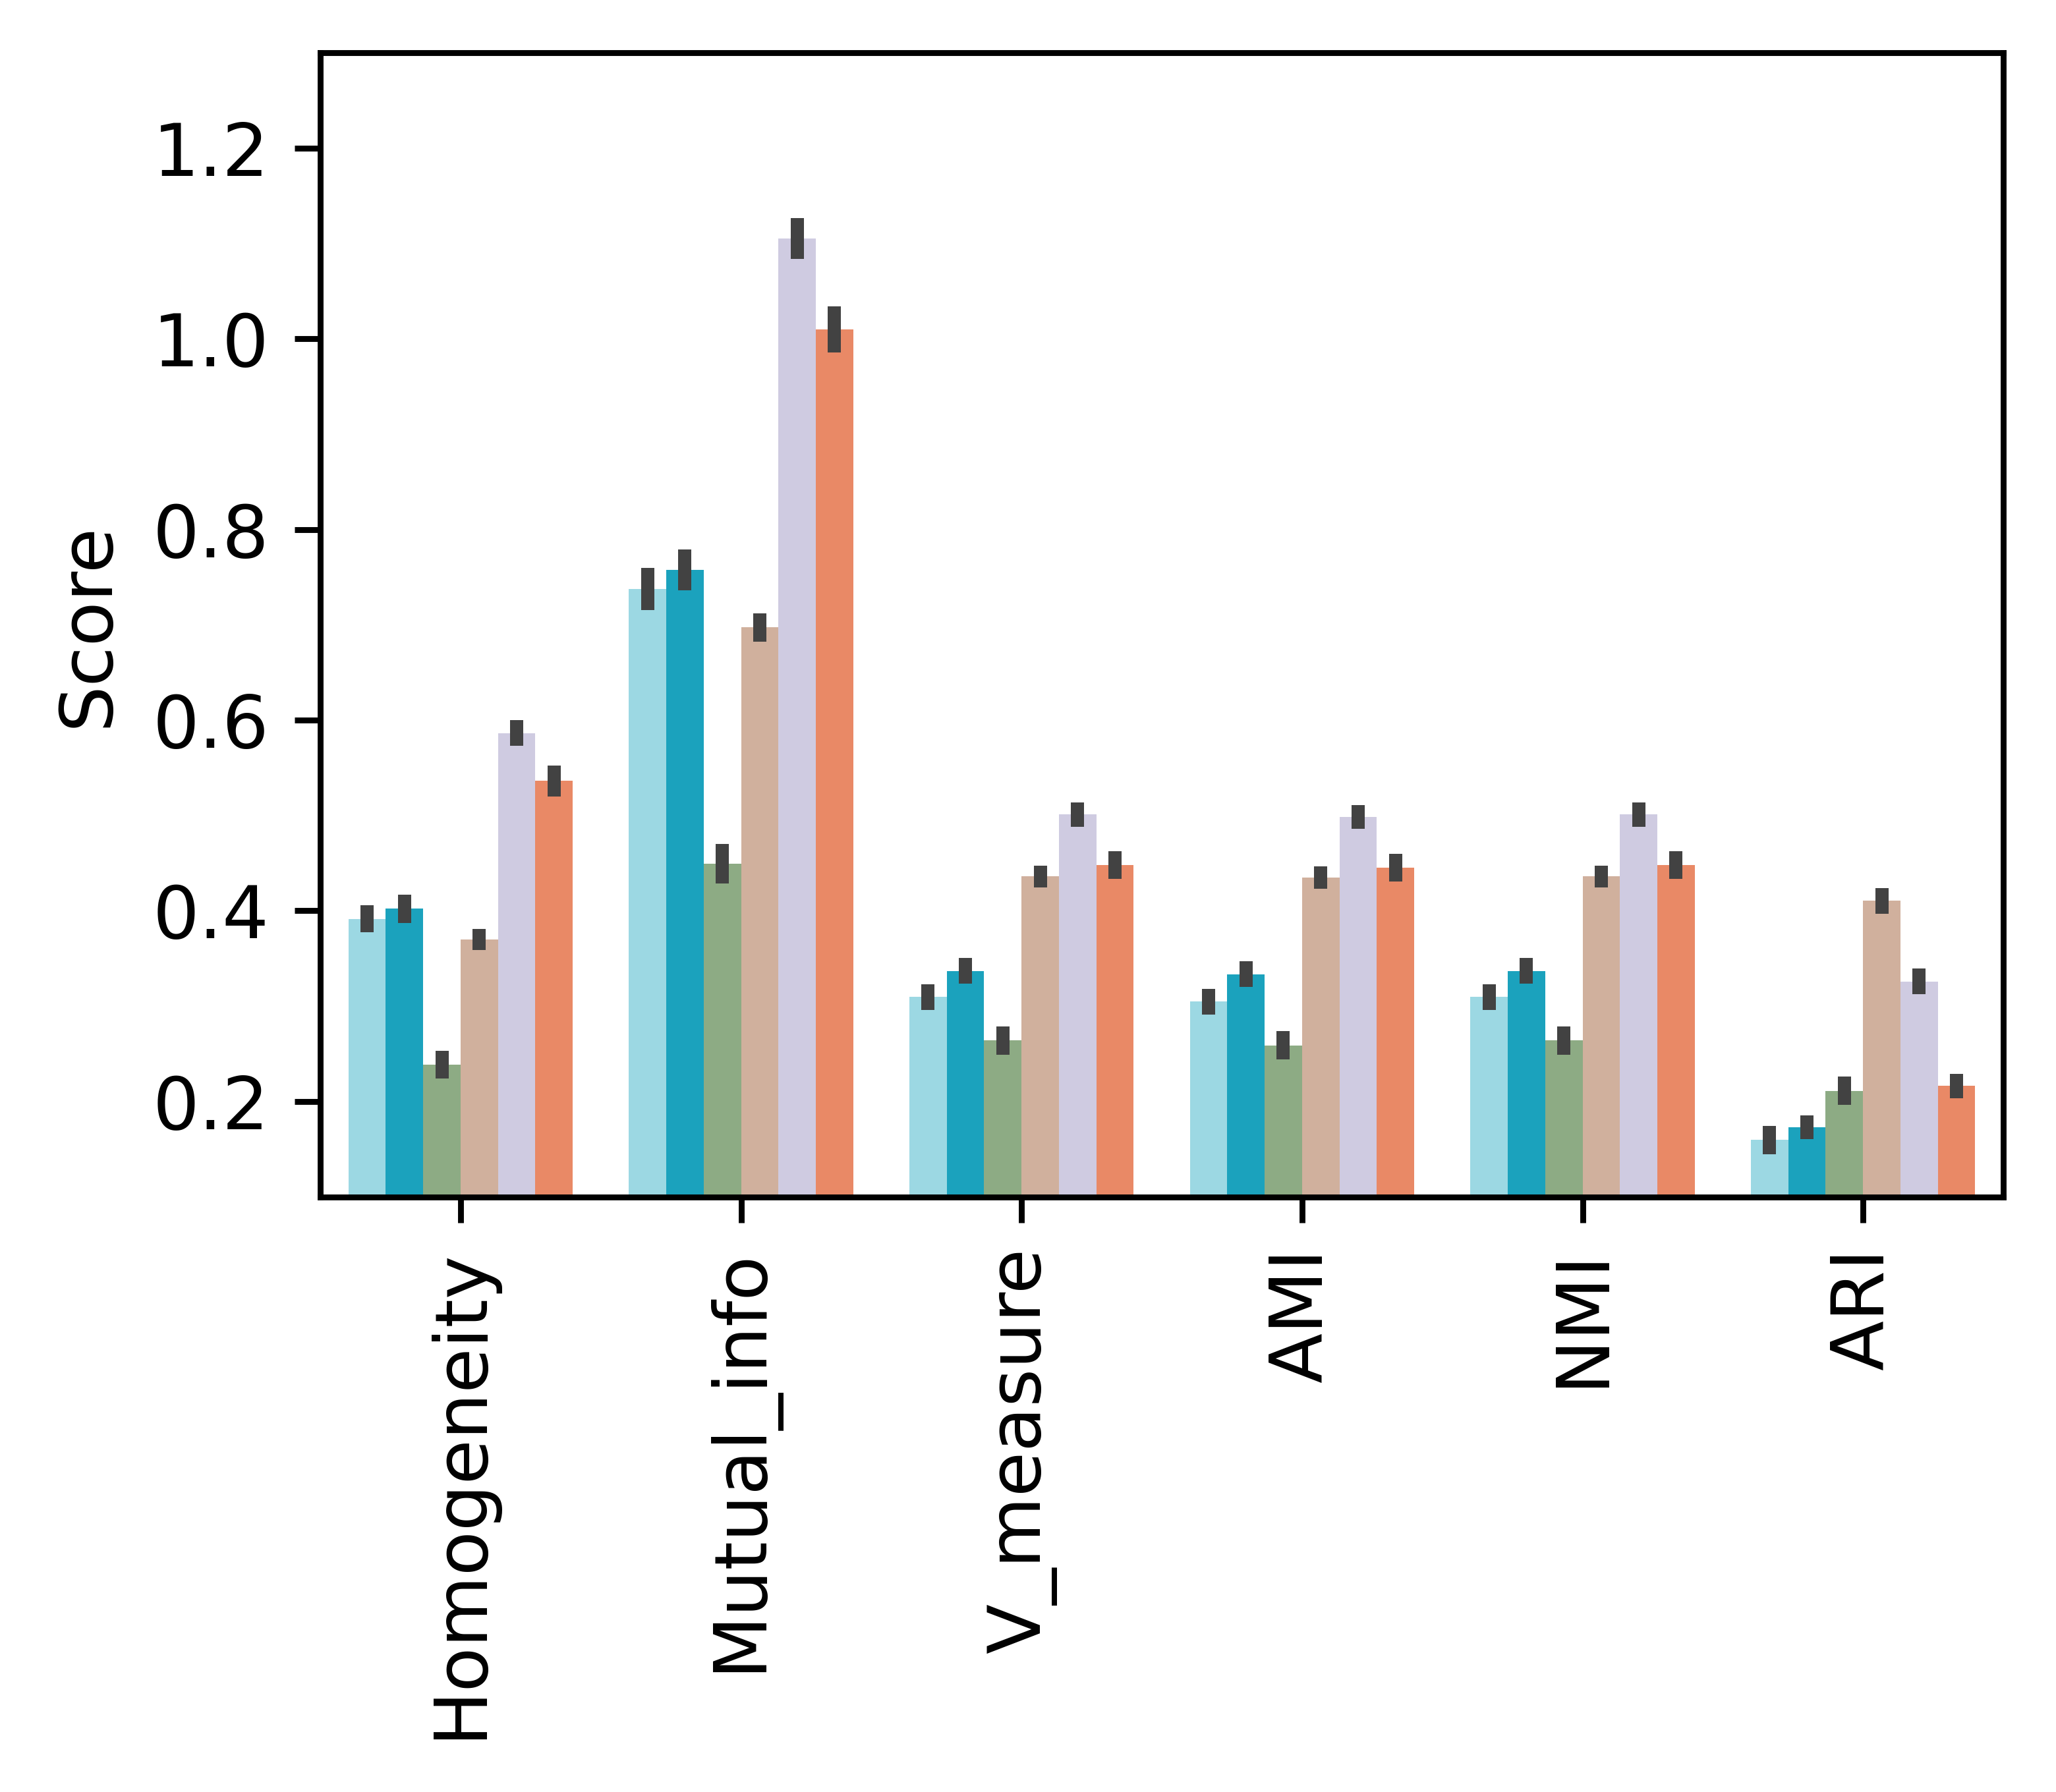

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert bootstrapped_scores to a long-format DataFrame
bootstrapped_scores_long = []

for metric, methods in bootstrapped_scores.items():
    for method, scores in methods.items():
        bootstrapped_scores_long.extend([
            {'Metric': metric, 'Method': method, 'Score': score} for score in scores
        ])

bootstrapped_scores_df = pd.DataFrame(bootstrapped_scores_long)

# Define custom colors for methods
custom_colors = ['#90e0ef','#00b4d8','#8ab17d','#d9ae94', '#cdc7e5', '#FF7F50']
custom_palette = dict(zip(['Modality 1', 'Modality 2', 'PCA concat', 'totalVI', 'SpatialGlue', 'Coral'], custom_colors))

# Plot using Seaborn
plt.figure(figsize=(4,3.5), dpi=800)
sns.barplot(
    x='Metric', y='Score', hue='Method', data=bootstrapped_scores_df, 
    palette=custom_palette, errorbar='sd' ,
    err_kws={'linewidth': 1.8}
)
plt.ylim([0.1,1.3])
plt.xlabel('')
plt.ylabel('Score')
plt.legend([], [], frameon=False)

plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('../figure/fig4d.pdf',dpi=600)

Processing Dataset 1
Dataset 1: Coords shape = (4468, 2), Labels = 4468
Dataset 1 Moran's I (Original): 0.18163185494932957
Dataset 1 Bootstrap Moran's I Scores: [0.19351017405408896, 0.18854452993158313, 0.17513199644612404, 0.1690341821783482, 0.19325711540367443, 0.158773829634212, 0.1997671115042345, 0.17933289077796813, 0.1813303873661757, 0.19077157035812717]...
Dataset 1 Moran's I Bootstrap 95% CI: [0.1611, 0.1984]
Processing Dataset 2
Dataset 2: Coords shape = (4468, 2), Labels = 4468
Dataset 2 Moran's I (Original): 0.3780663150984961
Dataset 2 Bootstrap Moran's I Scores: [0.37379634523611177, 0.3545414041894308, 0.38260090503399946, 0.36586078505008995, 0.3714982708728033, 0.3722119310476913, 0.3677561621335198, 0.39352940867208375, 0.38969041658474324, 0.358173026171452]...
Dataset 2 Moran's I Bootstrap 95% CI: [0.3554, 0.3927]
Processing Dataset 3
Dataset 3: Coords shape = (4468, 2), Labels = 4468
Dataset 3 Moran's I (Original): 0.09466919768864226
Dataset 3 Bootstrap Moran'

/tmp/ipykernel_3132219/1722051522.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=results_df, x='Dataset', y='Bootstrap_Moran_I', ci='sd')


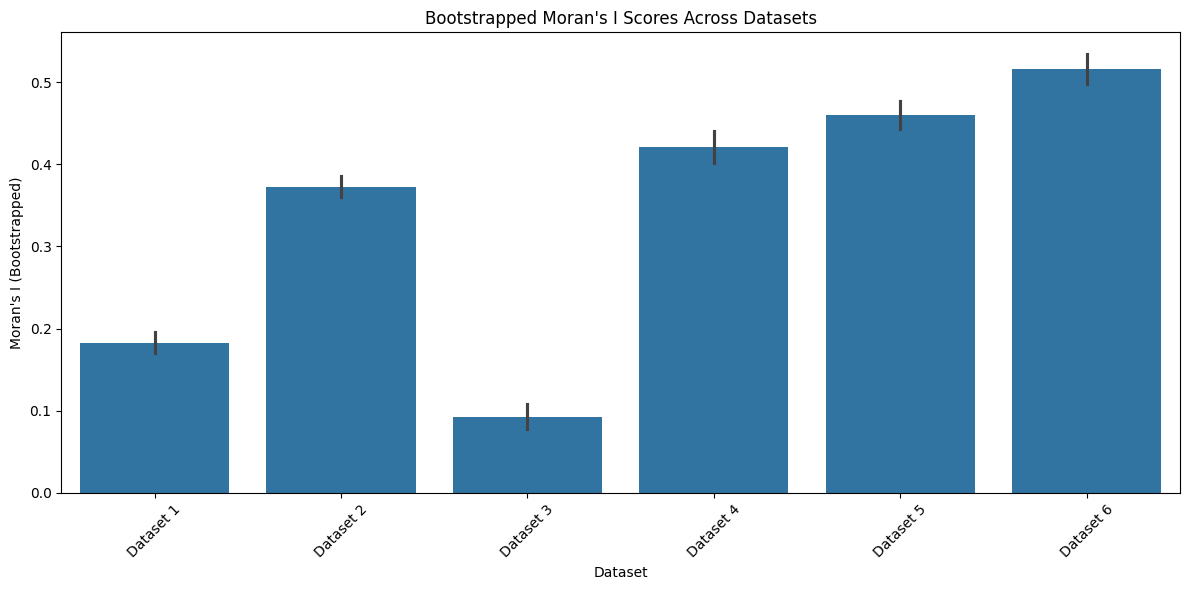

In [159]:
from esda.moran import Moran
from libpysal.weights import DistanceBand
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters for bootstrap
n_bootstraps = 10  # Number of bootstrap samples
sample_fraction = 0.8  # Fraction of data to sample in each bootstrap iteration

# DataFrame to store all bootstrapped results
results_df = pd.DataFrame()

# Loop through each dataset
for i, adata_ in enumerate(adata_list):
    dataset_name = f"Dataset {i+1}"  # Name each dataset for identification
    print(f"Processing {dataset_name}")

    # Extract spatial coordinates and labels
    coords = np.array(adata_.obsm['spatial'])[:, :2]  # Use only the first two columns
    labels = adata_.obs['cluster'].astype(float)  # Ensure labels are numerical

    # Check dimensions
    print(f"{dataset_name}: Coords shape = {coords.shape}, Labels = {len(labels)}")

    # Original Moran's I
    w = DistanceBand(coords, threshold=300.0, binary=True)
    moran = Moran(labels, w)
    print(f"{dataset_name} Moran's I (Original): {moran.I}")

    # Bootstrap Moran's I by sampling
    bootstrap_morans = []
    for _ in range(n_bootstraps):
        # Sample indices with replacement
        sampled_indices = np.random.choice(len(labels), size=int(len(labels) * sample_fraction), replace=True)

        # Create bootstrap sample
        sampled_coords = coords[sampled_indices]
        sampled_labels = labels.iloc[sampled_indices]

        # Create weights matrix for the sampled data
        w_bootstrap = DistanceBand(sampled_coords, threshold=300.0, binary=True)

        # Calculate Moran's I for the sampled data
        moran_bootstrap = Moran(sampled_labels, w_bootstrap)
        bootstrap_morans.append(moran_bootstrap.I)

    # Output bootstrap results
    print(f"{dataset_name} Bootstrap Moran's I Scores: {bootstrap_morans[:10]}...")  # Print first 10 scores for brevity

    # Save bootstrap results to the DataFrame
    temp_df = pd.DataFrame({
        'Dataset': [dataset_name] * len(bootstrap_morans),
        'Bootstrap_Moran_I': bootstrap_morans
    })
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

    # Calculate confidence intervals from bootstrap scores
    lower_ci = np.percentile(bootstrap_morans, 2.5)
    upper_ci = np.percentile(bootstrap_morans, 97.5)
    print(f"{dataset_name} Moran's I Bootstrap 95% CI: [{lower_ci:.4f}, {upper_ci:.4f}]")




p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Dataset 5 vs. Dataset 6: t-test independent samples, P_val:1.067e-06 t=-7.198e+00


/tmp/ipykernel_3132219/2136437189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1=sns.barplot(data=results_df, x='Dataset', y='Bootstrap_Moran_I', errorbar='sd',palette=custom_palette)


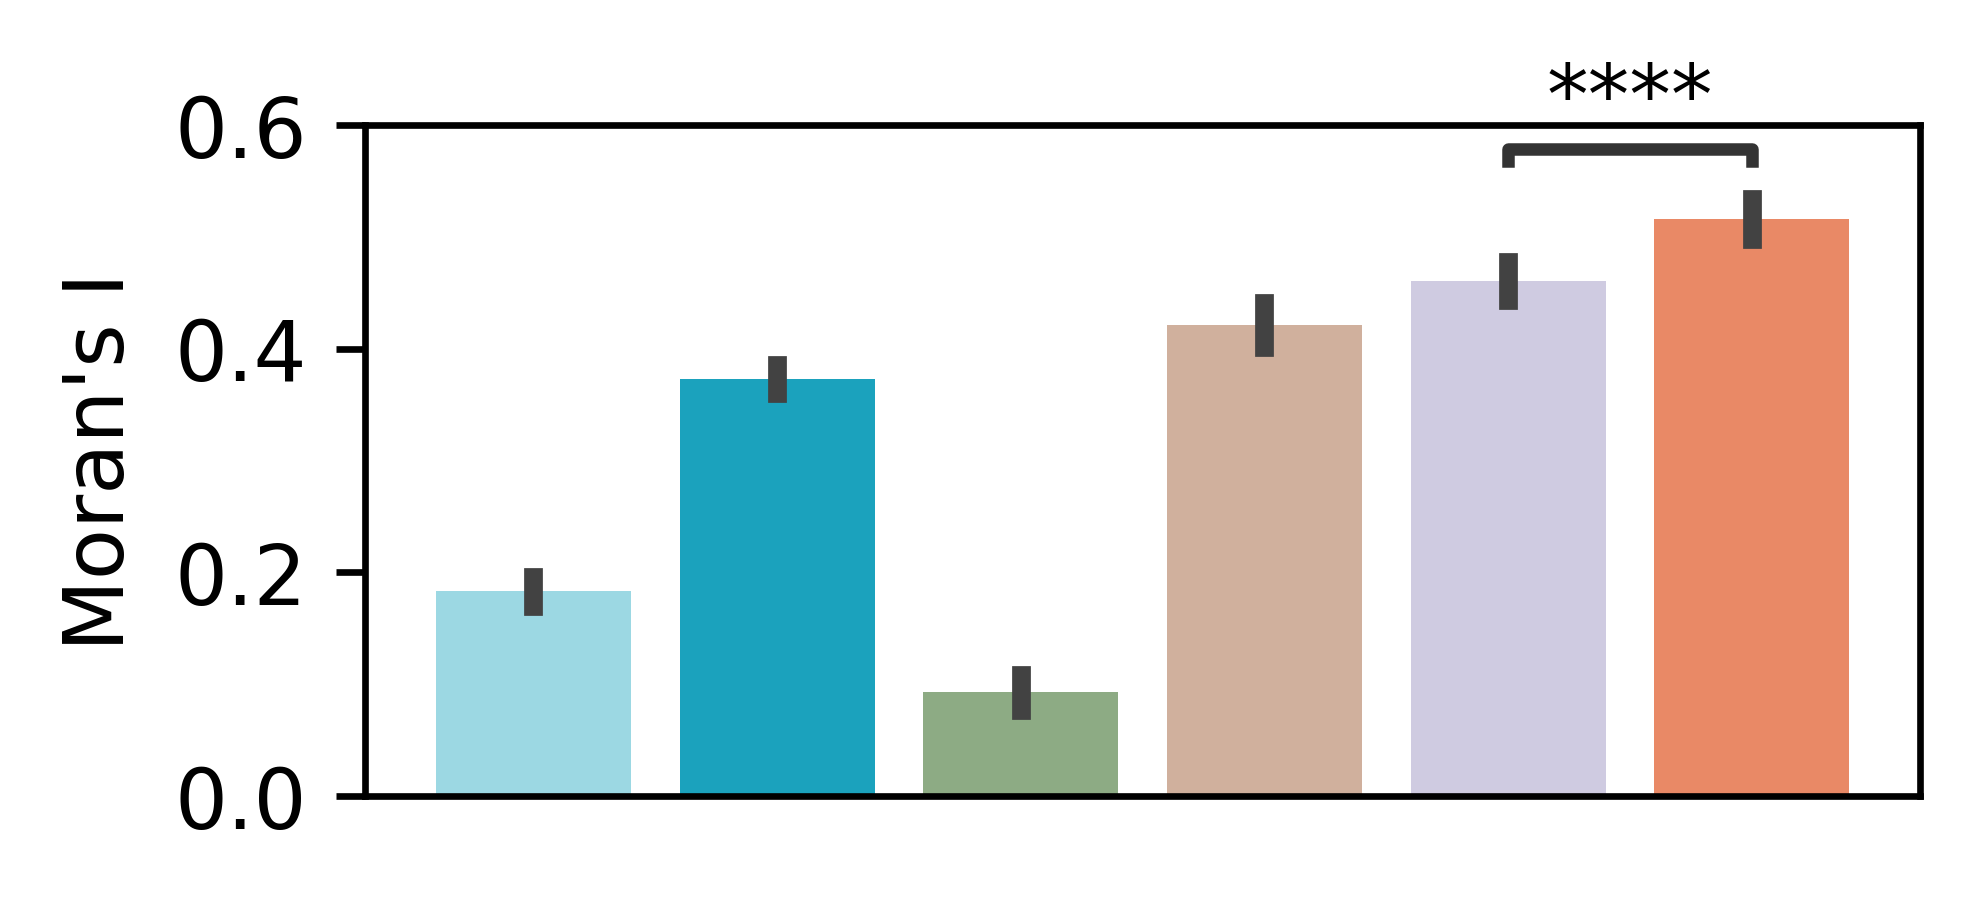

In [186]:
# Save the results to a CSV file

custom_colors = ['#90e0ef','#00b4d8','#8ab17d','#d9ae94', '#cdc7e5', '#FF7F50']  # Example colors for totalVI, SpatialGlue, Coral
# Create a custom color palette dictionary
custom_palette = dict(zip(['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5',
       'Dataset 6'], custom_colors))

#results_df.to_csv("bootstrapped_morans_results.csv", index=False)
#print("Saved bootstrapped results to 'bootstrapped_morans_results.csv'.")

# Plot the bootstrap results
plt.figure(figsize=(3.4,1.5),dpi=600)
g1=sns.barplot(data=results_df, x='Dataset', y='Bootstrap_Moran_I', errorbar='sd',palette=custom_palette)
#plt.title("Bootstrapped Moran's I Scores Across Datasets")
plt.ylabel("Moran's I")
plt.xlabel("")
plt.xticks([])


from statannotations.Annotator import Annotator

#plt.ylim([0.,1.1])

plt.xlabel('')
box_pairs = [
              #('Dataset 1', 'Dataset 6'),
   # ('Dataset 2', 'Dataset 6'),
   # ('Dataset 3', 'Dataset 6'),
   # ('Dataset 4', 'Dataset 6'),
    ('Dataset 5', 'Dataset 6')
            ]

annot = Annotator(g1, box_pairs, data=results_df, x='Dataset', y='Bootstrap_Moran_I')
annot.configure(test='t-test_ind', verbose=2,text_format='star')
annot.apply_test(#equal_var=False,
                 #alternative='greater'
                )
annot.annotate()
plt.tight_layout()
plt.ylim([0,0.6])
plt.savefig('../figure/fig4d2.pdf',dpi=600)

In [163]:
results_df['Dataset'].unique()

array(['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4', 'Dataset 5',
       'Dataset 6'], dtype=object)

In [149]:
from esda.moran import Moran
from libpysal.weights import DistanceBand
import numpy as np

# Loop through each dataset
for i, adata_ in enumerate(adata_list):
    # Extract spatial coordinates
    coords = np.array(adata_.obsm['spatial'])[:, :2]  # Use only the first two columns

    # Check dimensions
    print(f"Dataset {i+1}: Coords shape = {coords.shape}, Labels = {len(adata_.obs['cluster'])}")

    labels = adata_.obs['cluster'].astype(float)  # Ensure labels are numerical

    # Create weights matrix using DistanceBand
    w = DistanceBand(coords, threshold=300.0, binary=True)

    # Check alignment
    if len(labels) != w.n:
        print(f"Dimension mismatch for dataset {i+1}: labels={len(labels)}, weights={w.n}")
        continue

    # Calculate Moran's I
    moran = Moran(labels, w)
    print(f"Dataset {i+1} Moran's I: {moran.I}")


Dataset 1: Coords shape = (4468, 2), Labels = 4468
Dataset 1 Moran's I: 0.19477692059199303
Dataset 2: Coords shape = (4468, 2), Labels = 4468
Dataset 2 Moran's I: 0.4086711796952139
Dataset 3: Coords shape = (4468, 2), Labels = 4468
Dataset 3 Moran's I: 0.10362393364138485
Dataset 4: Coords shape = (4468, 2), Labels = 4468
Dataset 4 Moran's I: 0.4455811870036354
Dataset 5: Coords shape = (4468, 2), Labels = 4468
Dataset 5 Moran's I: 0.5019968987813772
Dataset 6: Coords shape = (4468, 2), Labels = 4468
Dataset 6 Moran's I: 0.5463840854344907


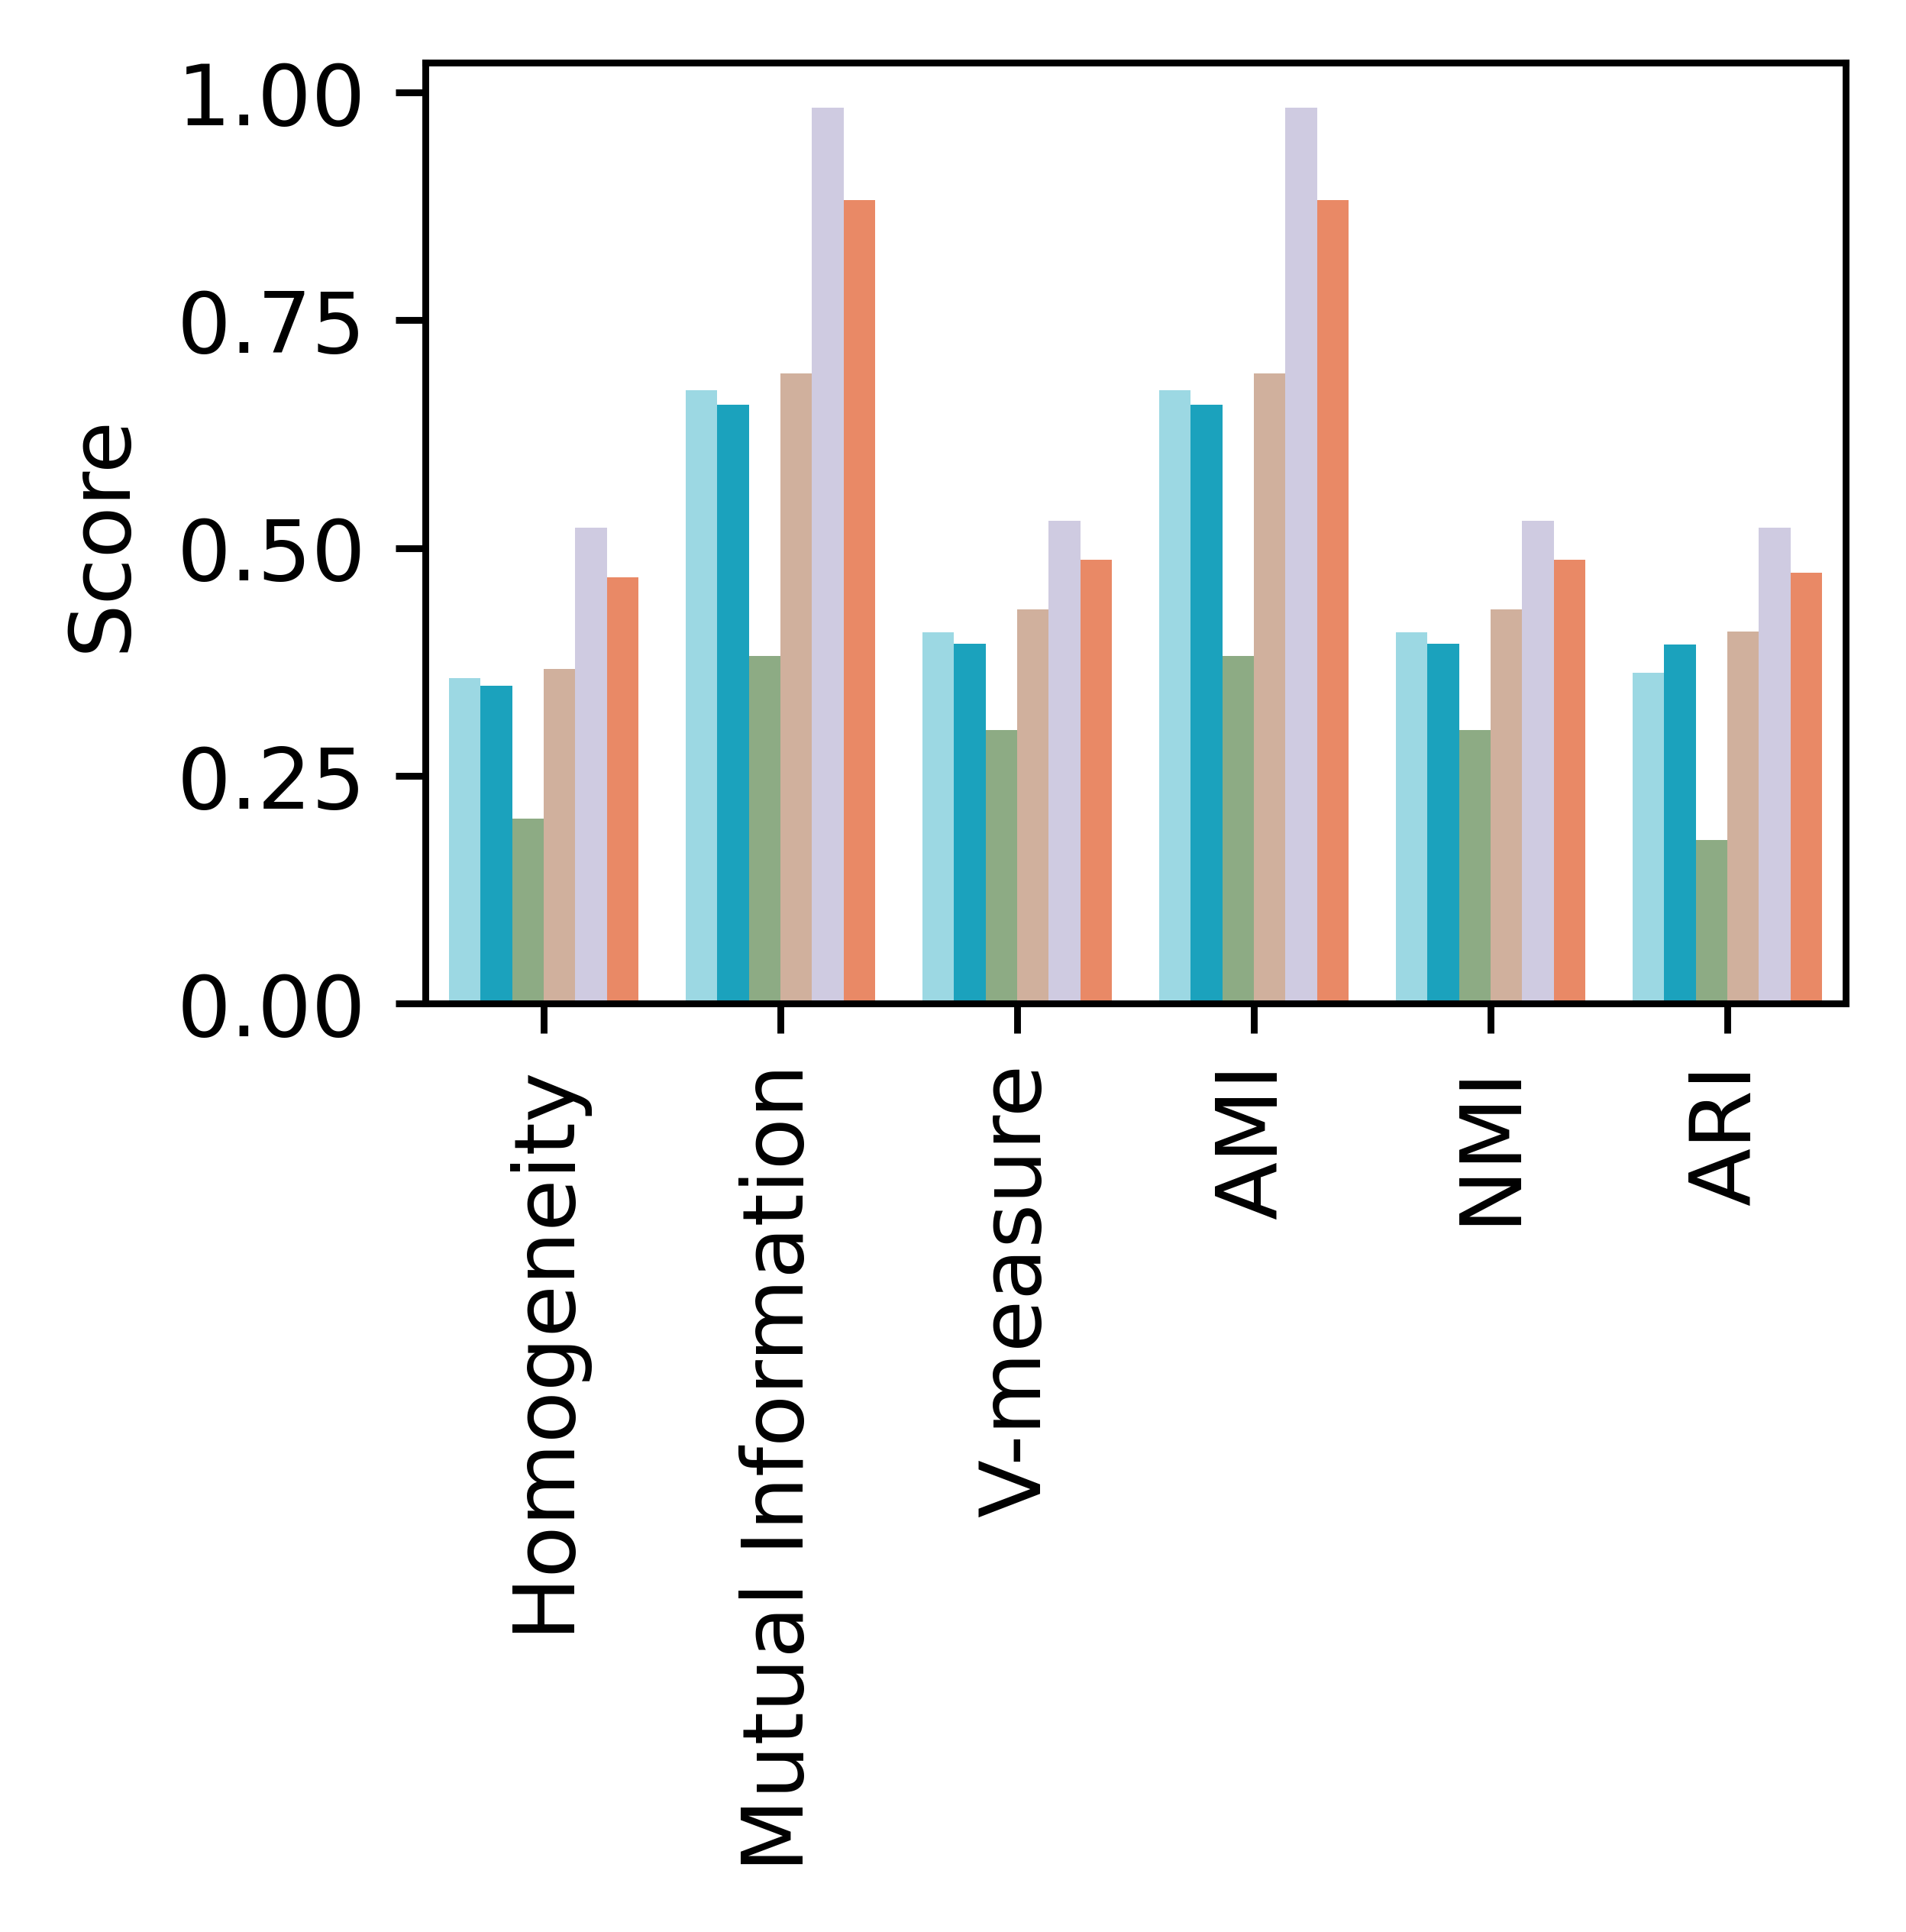

In [112]:
# Define custom colors for the different methods
custom_colors = ['#ffdacc',
                 '#ffa887',
                 '#ff9b76',
                 '#FF7F50', 
                 '#40e0d0', 
                 '#cdc7e5', 
                 '#00b4d8']  # Example colors
custom_colors = ['#90e0ef','#00b4d8','#8ab17d','#d9ae94', '#cdc7e5', '#FF7F50']  # Example colors for totalVI, SpatialGlue, Coral

# Create a custom color palette dictionary
custom_palette = dict(zip(metric_scores.columns, custom_colors))

# Plot the bar plot using seaborn
plt.figure(figsize=(3,2),dpi=800)
sns.barplot(x='Metric', y='Score', hue='Method', data=metric_scores_long, palette=custom_palette)

plt.xlabel('')
plt.ylabel('Score')
#plt.legend(title='Method', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.legend([], [], frameon=False)

plt.xticks(rotation=90)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

def spatial_silhouette_score(data, labels):
    return silhouette_score(data, labels)
def jaccard_index(true_mask, predicted_mask):
    intersection = np.logical_and(true_mask, predicted_mask).sum()
    union = np.logical_or(true_mask, predicted_mask).sum()
    return intersection / union

def dice_coefficient(true_mask, predicted_mask):
    intersection = np.logical_and(true_mask, predicted_mask).sum()
    return 2 * intersection / (true_mask.sum() + predicted_mask.sum())
from scipy.spatial import ConvexHull

def convex_hull_ratio(data, labels):
    unique_labels = np.unique(labels)
    ratios = []
    for label in unique_labels:
        points = data[labels == label]
        hull = ConvexHull(points)
        hull_area = hull.volume
        cluster_area = len(points)
        ratios.append(cluster_area / hull_area)
    return np.mean(ratios)
def cluster_transition_smoothness(data, labels):
    gradient = np.gradient(data)
    cluster_gradients = []
    for cluster_label in np.unique(labels):
        cluster_mask = (labels == cluster_label)
        cluster_gradients.append(np.mean(np.abs(gradient[cluster_mask])))
    return np.mean(cluster_gradients)
def spatial_homogeneity(data, labels, true_labels):
    distances = cdist(data, data)
    spatial_weights = np.exp(-distances)  # Gaussian kernel
    spatial_homogeneity = np.mean([
        spatial_weights[i, j] for i, j in zip(labels, true_labels)
    ])
    return spatial_homogeneity


for name, cluster_labels in clusters.items():
    print(name)
    
    # Create an empty dictionary to store overlap counts
    overlap_counts = defaultdict(lambda: defaultdict(int))

    # Count overlaps between each true label and each cluster label
    for true, cluster in zip(true_labels, cluster_labels):
        overlap_counts[cluster][true] += 1

    # Create a dictionary for the final mapping from cluster to true label
    cluster_to_true_mapping = {}

    # For each cluster label, find the true label with the maximum overlap
    for cluster, true_label_counts in overlap_counts.items():
        # Find the true label with the highest overlap count
        best_true_label = max(true_label_counts, key=true_label_counts.get)
        cluster_to_true_mapping[cluster] = best_true_label

    # Map each cluster label in `cluster_labels` to its corresponding true label
    aligned_cluster_labels = cluster_labels.map(cluster_to_true_mapping).fillna(cluster_labels)

    jaccard_index(true_labels, aligned_cluster_labels)

data_1_cluster


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [100]:
from sklearn.metrics import adjusted_rand_score, mutual_info_score, normalized_mutual_info_score, homogeneity_completeness_v_measure, jaccard_score
from collections import defaultdict

# Initialize metrics dictionary
metrics_dict = {name: {'Homogeneity': 0, 
                       'Mutual Information': 0, 
                       'V-measure': 0, 
                       'AMI': 0, 
                       'NMI': 0, 
                       'ARI': 0, 
                       'Jaccard': 0} for name in clusters}

# Calculate metrics for each clustering
for name, cluster_labels in clusters.items():
    # Create an empty dictionary to store overlap counts
    overlap_counts = defaultdict(lambda: defaultdict(int))

    # Count overlaps between each true label and each cluster label
    for true, cluster in zip(true_labels, cluster_labels):
        overlap_counts[cluster][true] += 1

    # Map clusters to the most frequent true label in each cluster
    cluster_to_true_mapping = {cluster: max(true_label_counts, key=true_label_counts.get)
                               for cluster, true_label_counts in overlap_counts.items()}

    # Map each cluster label in `cluster_labels` to its corresponding true label
    aligned_cluster_labels = [cluster_to_true_mapping.get(cluster, cluster) for cluster in cluster_labels]

    # Calculate clustering metrics
    ari = adjusted_rand_score(true_labels, aligned_cluster_labels)
    ami = mutual_info_score(true_labels, aligned_cluster_labels)
    nmi = normalized_mutual_info_score(true_labels, aligned_cluster_labels)
    mi = mutual_info_score(true_labels, aligned_cluster_labels)
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_labels, aligned_cluster_labels)
    jaccard = jaccard_score(true_labels, aligned_cluster_labels, average='macro')

    # Store metrics in the dictionary
    metrics_dict[name] = {
        'Homogeneity': homogeneity,
        'Mutual Information': mi,
        'V-measure': v_measure,
        'AMI': ami,
        'NMI': nmi,
        'ARI': ari,
        'Jaccard': jaccard
    }

metrics_dict




{'data_1_cluster': {'Homogeneity': 0.4924779875275583,
  'Mutual Information': 0.9279072224830497,
  'V-measure': 0.49274863771253397,
  'AMI': 0.9279072224830497,
  'NMI': 0.4927486377125339,
  'ARI': 0.5058591471741334,
  'Jaccard': 0.4863561088365417},
 'data_2_cluster': {'Homogeneity': 0.34352015075294096,
  'Mutual Information': 0.6472468557476042,
  'V-measure': 0.3866079802178162,
  'AMI': 0.6472468557476042,
  'NMI': 0.3866079802178163,
  'ARI': 0.38321706437448966,
  'Jaccard': 0.26829767956386164},
 'data_3_cluster': {'Homogeneity': 0.20262320219781593,
  'Mutual Information': 0.38177449048212675,
  'V-measure': 0.299739759978056,
  'AMI': 0.38177449048212675,
  'NMI': 0.299739759978056,
  'ARI': 0.17919184711935254,
  'Jaccard': 0.17600149561676814},
 'data_4_cluster': {'Homogeneity': 0.3968640531995142,
  'Mutual Information': 0.7477552918791515,
  'V-measure': 0.4744535172508132,
  'AMI': 0.7477552918791515,
  'NMI': 0.47445351725081314,
  'ARI': 0.42823629166217075,
  'Ja

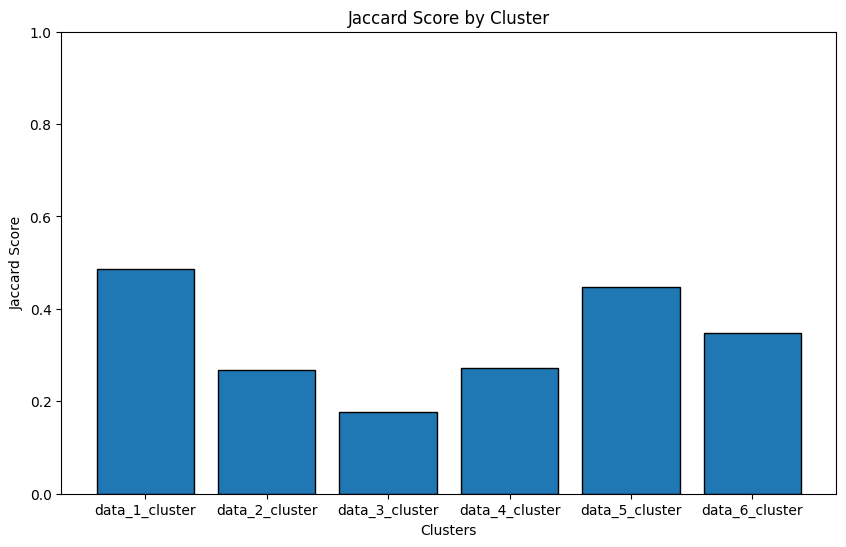

In [101]:
# Extract cluster names and Jaccard scores
clusters = list(metrics_dict.keys())
jaccard_scores = [metrics_dict[cluster]['Jaccard'] for cluster in clusters]

# Plot Jaccard scores
plt.figure(figsize=(10, 6))
plt.bar(clusters, jaccard_scores, edgecolor='black')
plt.xlabel("Clusters")
plt.ylabel("Jaccard Score")
plt.title("Jaccard Score by Cluster")
plt.ylim(0, 1)  # Jaccard scores range from 0 to 1
plt.show()